In [147]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv(
    "/Users/oas/Documents/VOD/vod/DOCKER_STATS_LOG_QdrantLoggerTest.csv", delimiter=r"\s\s+", engine="python"
)

In [149]:
df = df.query("NAME != 'NAME'")

In [150]:
# change name of timestamp
columns = df.columns.tolist()
columns[0] = "TIMESTAMP"
df.columns = columns

In [151]:
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.TIMESTAMP = df.TIMESTAMP + pd.Timedelta(hours=1)


In [152]:
print("processes:", df.NAME.unique())

processes: ['charming_babbage' 'milvus-standalone' 'milvus-minio' 'milvus-etcd'
 'practical_murdock' 'recursing_fermat' 'sad_antonelli']


In [153]:
def plot_memory_usage(df):
    for process in df.NAME.unique():
        df_subset = df.query(f"NAME == '{process}'")
        memory_usage = df_subset["MEM USAGE / LIMIT"].apply(lambda s: s.split("/")[0][:-4]).astype("float").values
        # t = range(0,len(memory_usage))
        plt.plot(df_subset.TIMESTAMP, memory_usage, label=process, marker="x")
        plt.xticks(rotation=45)
        plt.title(f"{process} memory usage")
        plt.xlabel("Time")
        plt.ylabel("Memory Usage (MiB)")
    plt.legend()
    plt.show()

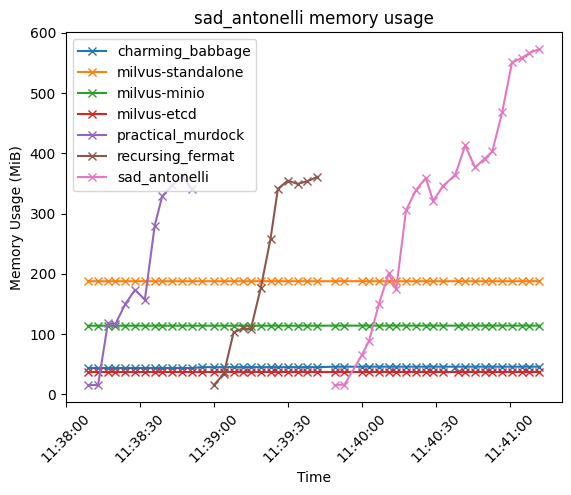

In [154]:
plot_memory_usage(df)

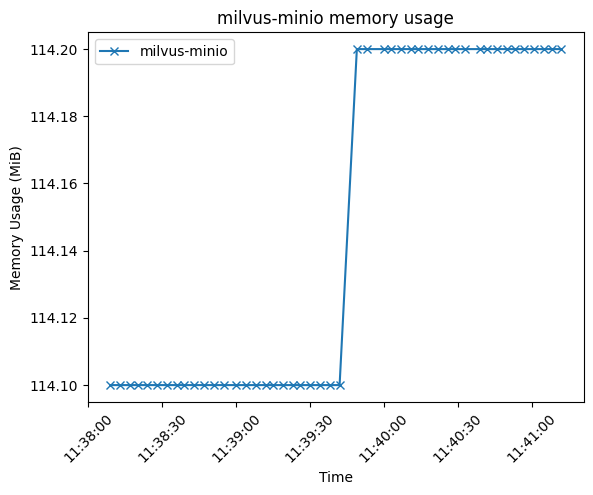

In [155]:
plot_memory_usage(df.query("NAME == 'milvus-minio'"))